In [1]:
%pylab inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


In [2]:
colNames = ['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view',
            'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
           'sqft_living15', 'sqft_lot15']
data = pd.read_csv("./kc_house_data.csv", names=colNames, header=0)

In [3]:
data.loc[data.yr_renovated == 0, 'yr_renovated'] = data['yr_built']
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,1955,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,1933,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,1965,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,1987,98074,47.6168,-122.045,1800,7503


In [4]:
corrmat = data.corr()
corrmat['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.105755
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

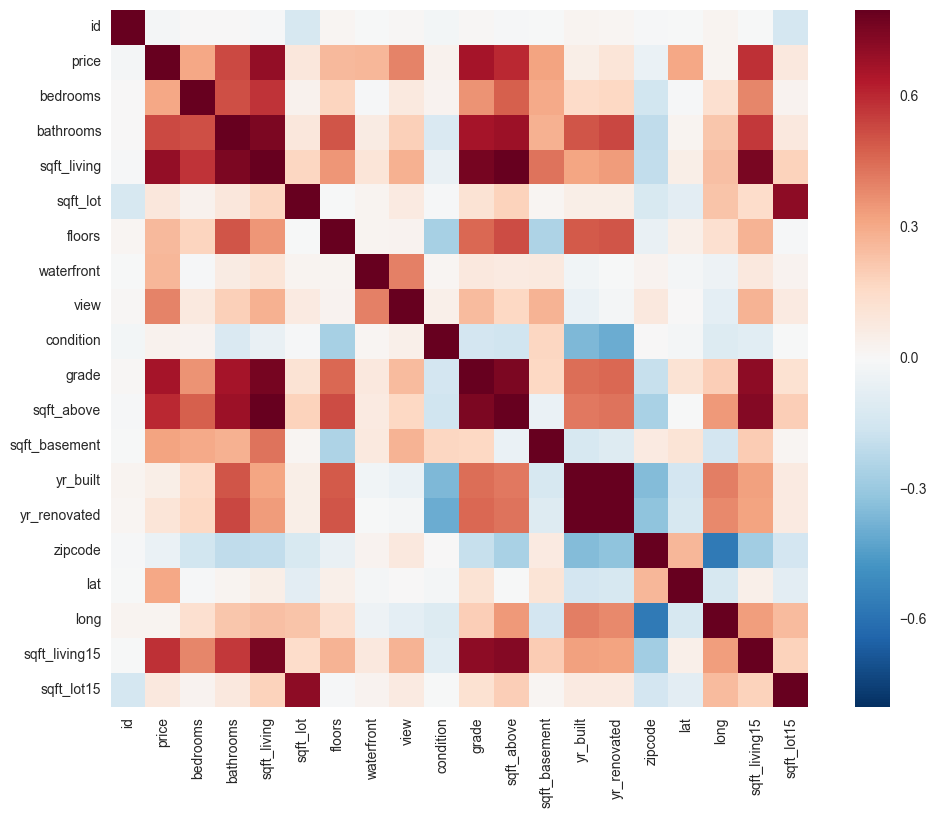

In [5]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True);

In [6]:
features = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view',
            'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
           'sqft_living15', 'sqft_lot15']

In [7]:
mydata = data[features]

In [8]:
X = mydata.iloc[:, 1:]
y = mydata.iloc[:, 0]

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [10]:
print X_train.shape
print y_train.shape
print X_test.shape
print y_test.shape

(14480, 18)
(14480,)
(7133, 18)
(7133,)


## Gradient boosting

In [11]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(random_state=0)
gb.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=0, subsample=1.0, verbose=0,
             warm_start=False)

In [12]:
print("Root mean squared error: %.6f"
      % np.sqrt(np.mean((gb.predict(X_test) - y_test) ** 2)))
print('Variance score: %.6f' % gb.score(X_test, y_test))

Root mean squared error: 145482.858460
Variance score: 0.858645


In [13]:
for c, i in sorted(zip(gb.feature_importances_, features[1:]), reverse=True):
     print ("% 20s  | coef: %.6f" % (i, c))

                 lat  | coef: 0.206506
         sqft_living  | coef: 0.124295
                long  | coef: 0.094699
               grade  | coef: 0.087567
             zipcode  | coef: 0.084033
       sqft_living15  | coef: 0.067524
            yr_built  | coef: 0.051525
          sqft_above  | coef: 0.045686
            sqft_lot  | coef: 0.042790
                view  | coef: 0.033282
          waterfront  | coef: 0.032690
        yr_renovated  | coef: 0.029360
       sqft_basement  | coef: 0.028949
           bathrooms  | coef: 0.028093
           condition  | coef: 0.021530
          sqft_lot15  | coef: 0.013708
            bedrooms  | coef: 0.007763
              floors  | coef: 0.000000


### Tuning the parameters for gradient boosting

In [14]:
learning_rate_arr = list(np.arange(0.08, 0.141, 0.005))
n_estimators_arr = list(np.arange(100, 701, 50))
subsample_arr = [0.7, 0.8, 0.85, 0.9, 0.95, 1]
max_feature_arr = ['log2', 'sqrt', 'auto']

minRMSE = float('inf')
bestParameter = dict()

for l in range(len(learning_rate_arr)):
    for n in range(len(n_estimators_arr)):
        for s in range(len(subsample_arr)):
            for m in range(len(max_feature_arr)):
                gbr = GradientBoostingRegressor(learning_rate = learning_rate_arr[l], \
                                                                n_estimators = n_estimators_arr[n], \
                                                                subsample = subsample_arr[s], \
                                                                max_features = max_feature_arr[m])
                gbr.fit(X_train, y_train)
                RMSE = np.sqrt(np.mean((gbr.predict(X_test) - y_test) ** 2))
                #print (RMSE)
                if RMSE < minRMSE: 
                    minRMSE = RMSE
                    bestParameter = {'learning_rate' : learning_rate_arr[l], \
                                     'n_estimators' : n_estimators_arr[n], \
                                     'subsample' : subsample_arr[s], \
                                     'max_feature' : max_feature_arr[m]       
                                    }

In [41]:
print bestParameter

{'n_estimators': 650, 'subsample': 0.8, 'learning_rate': 0.13500000000000006, 'max_feature': 'auto'}


In [45]:
print minRMSE

125784.505942


In [17]:
price_mean= y_test.mean()
print (price_mean)
print (minRMSE / price_mean)

544755.309968
0.230900926784


In [61]:
best_gb = GradientBoostingRegressor(learning_rate = bestParameter['learning_rate'], \
                                       n_estimators = bestParameter['n_estimators'], \
                                       subsample = bestParameter['subsample'], \
                                       max_features = bestParameter['max_feature'],
                                   random_state=0)
best_gb.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.13500000000000006, loss='ls', max_depth=3,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=650, presort='auto', random_state=0,
             subsample=0.8, verbose=0, warm_start=False)

In [62]:
print("Root mean squared error: %.6f"
      % np.sqrt(np.mean((best_gb.predict(X_test) - y_test) ** 2)))
print('Variance score: %.6f' % best_gb.score(X_test, y_test))

Root mean squared error: 132595.359095
Variance score: 0.882580


In [63]:
for c, i in sorted(zip(best_gb.feature_importances_, features[1:]), reverse=True):
     print ("% 20s  | coef: %.6f" % (i, c))

                 lat  | coef: 0.117181
                long  | coef: 0.103081
         sqft_living  | coef: 0.100341
       sqft_living15  | coef: 0.096008
          sqft_above  | coef: 0.094870
             zipcode  | coef: 0.076633
            sqft_lot  | coef: 0.073512
          sqft_lot15  | coef: 0.054398
            yr_built  | coef: 0.052590
        yr_renovated  | coef: 0.045683
               grade  | coef: 0.041248
           bathrooms  | coef: 0.038227
       sqft_basement  | coef: 0.036049
                view  | coef: 0.027821
           condition  | coef: 0.012669
          waterfront  | coef: 0.010185
            bedrooms  | coef: 0.009958
              floors  | coef: 0.009546


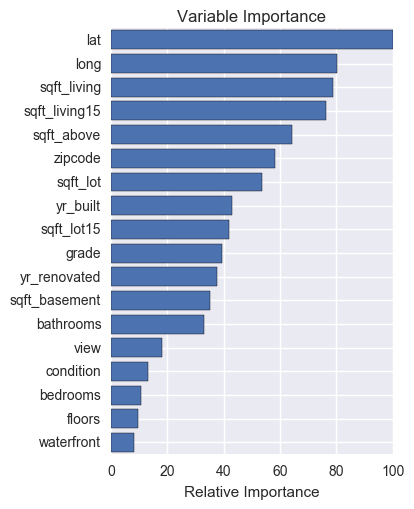

In [51]:
feature_importance = best_gb.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

## Random forest

In [18]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=0)
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

In [19]:
print("Root mean squared error: %.6f"
      % np.sqrt(np.mean((rfr.predict(X_test) - y_test) ** 2)))
print('Variance score: %.6f' % rfr.score(X_test, y_test))

Root mean squared error: 155956.031505
Variance score: 0.837561


In [20]:
for c, i in sorted(zip(rfr.feature_importances_, features[1:]), reverse=True):
     print ("% 20s  | coef: %.6f" % (i, c))

               grade  | coef: 0.327045
         sqft_living  | coef: 0.230381
                 lat  | coef: 0.146202
                long  | coef: 0.067514
            yr_built  | coef: 0.038474
          waterfront  | coef: 0.034655
       sqft_living15  | coef: 0.034580
           bathrooms  | coef: 0.027801
          sqft_above  | coef: 0.019843
            sqft_lot  | coef: 0.015218
             zipcode  | coef: 0.014587
          sqft_lot15  | coef: 0.011647
                view  | coef: 0.010492
        yr_renovated  | coef: 0.008752
       sqft_basement  | coef: 0.005094
           condition  | coef: 0.003002
            bedrooms  | coef: 0.002649
              floors  | coef: 0.002063


### Tuning the parameters for random forest

In [36]:
rf_n_estimators_arr = list(np.arange(1, 11))
for i in range(10):
    rf_n_estimators_arr[i] = pow(2, rf_n_estimators_arr[i])

rf_max_feature_arr = ['log2', 'sqrt', 'auto']

rf_minRMSE = float('inf')
rf_bestParameter = dict()

rf_n_estimators_RMSE_auto = []


for m in range(len(rf_max_feature_arr)):
    for n in range(len(rf_n_estimators_arr)):
            regForest = RandomForestRegressor(n_estimators = rf_n_estimators_arr[n], \
                                              max_features = rf_max_feature_arr[m])
            regForest.fit(X_train, y_train)
            RMSE = np.sqrt(np.mean((regForest.predict(X_test) - y_test) ** 2))
            if RMSE < rf_minRMSE: 
                rf_minRMSE = RMSE
                rf_bestParameter = {'n_estimators' : rf_n_estimators_arr[n], \
                                    'max_feature' : rf_max_feature_arr[m]       
                                    }                
            if rf_max_feature_arr[m] == 'auto': 
                    rf_n_estimators_RMSE_auto.append(RMSE)

In [37]:
print(rf_minRMSE)
print(rf_bestParameter)

146359.534534
{'n_estimators': 512, 'max_feature': 'auto'}


In [38]:
print (rf_minRMSE / price_mean)

0.268670230204


In [64]:
best_rf = regForest = RandomForestRegressor(n_estimators = rf_bestParameter['n_estimators'], \
                                            max_features = rf_bestParameter['max_feature'],
                                           random_state=0)
best_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=512, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

In [65]:
print("Root mean squared error: %.6f"
      % np.sqrt(np.mean((best_rf.predict(X_test) - y_test) ** 2)))
print('Variance score: %.6f' % best_rf.score(X_test, y_test))

Root mean squared error: 146337.199049
Variance score: 0.856980


In [66]:
for c, i in sorted(zip(best_rf.feature_importances_, features[1:]), reverse=True):
     print ("% 20s  | coef: %.6f" % (i, c))

               grade  | coef: 0.340315
         sqft_living  | coef: 0.238612
                 lat  | coef: 0.147222
                long  | coef: 0.068294
            yr_built  | coef: 0.032496
       sqft_living15  | coef: 0.031730
          waterfront  | coef: 0.030566
          sqft_above  | coef: 0.019512
           bathrooms  | coef: 0.017651
             zipcode  | coef: 0.014142
            sqft_lot  | coef: 0.013835
          sqft_lot15  | coef: 0.012899
                view  | coef: 0.010048
        yr_renovated  | coef: 0.008136
       sqft_basement  | coef: 0.006472
            bedrooms  | coef: 0.003213
           condition  | coef: 0.002905
              floors  | coef: 0.001950


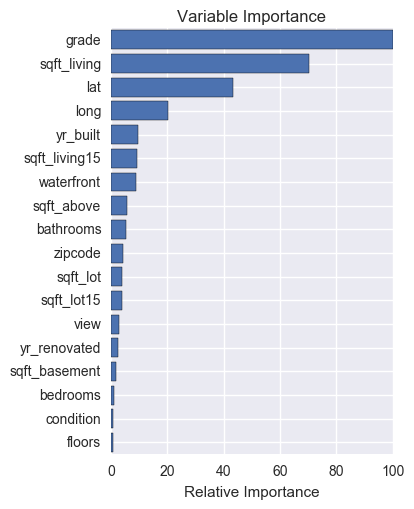

In [67]:
rf_feature_importance = best_rf.feature_importances_
# make importances relative to max importance
rf_feature_importance = 100.0 * (rf_feature_importance / rf_feature_importance.max())
sorted_idx = np.argsort(rf_feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, rf_feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()